In [1]:
# Load the libraries
import pandas as pd

# Import from scikitlearn
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import from tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt






# Import from scikitlearn
from sklearn.metrics import accuracy_score

# Import models for testing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Check that a GPU is available
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# Not sure why, but I need this to get TF to work
# from: https://www.tensorflow.org/guide/gpu#limiting_gpu_memory_growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


#### Load the data

In [4]:
# Load in the data
load_path = '../Datasets/yelp/'
X_df = pd.read_csv(load_path + 'representation_word2vec.csv')[0:50000]
y_df = pd.read_csv(load_path + 'labels.csv')['label']

#### Prepare the data

In [5]:
# Convert X to matrix
X = X_df.values

In [6]:
# Check dimensions
print(f'X dimensions: {len(X)}, {len(X[0])}')

X dimensions: 50000, 40


In [7]:
# Subtract 1 from values so range is [0, 4]
y_df_subtracted = y_df.apply(lambda x: str(x - 1))

# Convert y to list
y_list = list(y_df_subtracted)

# Convert y to one-hot encoded vectors
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y_list)

In [8]:
# Check dimensions of y
y.shape

(50000, 5)

In [9]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [10]:
# Check dimensions
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (37500, 40)
X_test: (12500, 40)
y_train: (37500, 5)
y_test: (12500, 5)


#### Define the Model Layers

In [11]:
# Define the perceptron architecture
i = Input(shape=len(X_train[0]), dtype=tf.int32)
x = Dense(units=len(X_train[0]), activation='relu')(i)
x = Dense(y_train.shape[1], activation='softmax')(x)

In [12]:
# Build the model
model = Model(i, x)

In [13]:
# Have a look at the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40)]              0         
_________________________________________________________________
dense (Dense)                (None, 40)                1640      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 205       
Total params: 1,845
Trainable params: 1,845
Non-trainable params: 0
_________________________________________________________________


### Define how the model should be trained

In [14]:
# Define how the model should be trained
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), # CNN-Kim uses SGD with Adelta update rule
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Create learning rate decay function
def lr_scheduler(epoch, lr):
    learning_rate = lr * 0.9
    print(f'Learning Rate: {learning_rate}')
    return learning_rate

# define the learning rate scheduler
callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

### Train the model

In [16]:
# Train the model
result = model.fit(X_train, y_train,
                   epochs=50,
                   validation_data=(X_test, y_test),
                   batch_size=128,
                   callbacks=[callback]);

Train on 37500 samples, validate on 12500 samples
Learning Rate: 0.0009000000427477062
Epoch 1/50
37500/37500 [==============================] - 1s 28us/sample - loss: 1.2069 - accuracy: 0.4787 - val_loss: 1.0906 - val_accuracy: 0.5338
Learning Rate: 0.0008100000384729356
Epoch 2/50
37500/37500 [==============================] - 1s 14us/sample - loss: 1.0569 - accuracy: 0.5464 - val_loss: 1.0594 - val_accuracy: 0.5438
Learning Rate: 0.0007290000503417104
Epoch 3/50
37500/37500 [==============================] - 1s 15us/sample - loss: 1.0382 - accuracy: 0.5527 - val_loss: 1.0522 - val_accuracy: 0.5436
Learning Rate: 0.0006561000715009868
Epoch 4/50
37500/37500 [==============================] - 1s 14us/sample - loss: 1.0303 - accuracy: 0.5578 - val_loss: 1.0468 - val_accuracy: 0.5493
Learning Rate: 0.0005904900433961303
Epoch 5/50
37500/37500 [==============================] - 1s 14us/sample - loss: 1.0258 - accuracy: 0.5591 - val_loss: 1.0441 - val_accuracy: 0.5491
Learning Rate: 0.000

37500/37500 [==============================] - 1s 15us/sample - loss: 1.0047 - accuracy: 0.5660 - val_loss: 1.0381 - val_accuracy: 0.5503
Learning Rate: 8.727965268917615e-06
Epoch 45/50
37500/37500 [==============================] - 1s 16us/sample - loss: 1.0047 - accuracy: 0.5662 - val_loss: 1.0381 - val_accuracy: 0.5504
Learning Rate: 7.855168496462283e-06
Epoch 46/50
37500/37500 [==============================] - 1s 15us/sample - loss: 1.0046 - accuracy: 0.5662 - val_loss: 1.0381 - val_accuracy: 0.5506
Learning Rate: 7.069651564961533e-06
Epoch 47/50
37500/37500 [==============================] - 1s 15us/sample - loss: 1.0046 - accuracy: 0.5661 - val_loss: 1.0381 - val_accuracy: 0.5506
Learning Rate: 6.362686326610856e-06
Epoch 48/50
37500/37500 [==============================] - 1s 17us/sample - loss: 1.0046 - accuracy: 0.5662 - val_loss: 1.0381 - val_accuracy: 0.5506
Learning Rate: 5.726417612095247e-06
Epoch 49/50
37500/37500 [==============================] - 1s 17us/sample - l

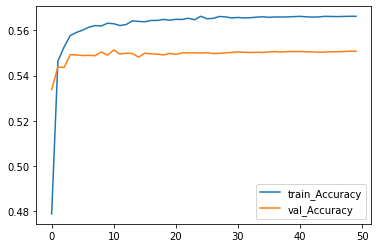

In [17]:
# Plot the Recall metric at each itteration
plt.plot(result.history['accuracy'], label='train_Accuracy');
plt.plot(result.history['val_accuracy'], label='val_Accuracy');
plt.legend();

In [18]:
# Split into train and test sets
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.25, random_state=100)

#### Logistic Regression

In [19]:
# Train the model and get a prediction (for the test data)
model = LogisticRegression(C=1, solver='sag', multi_class='multinomial')
model.fit(X_train_df, y_train_df)
y_pred = model.predict(X_test_df)
accuracy_score(y_test_df, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.59088

#### SVC

In [20]:
# Train the model and get a prediction (for the test data)
model = SVC(C=1)
model.fit(X_train_df, y_train_df)
y_pred = model.predict(X_test_df)
accuracy_score(y_test_df, y_pred)

0.58872

#### Linear SCV

In [21]:
# Train the model and get a prediction (for the test data)
model = LinearSVC(C=1)
model.fit(X_train_df, y_train_df)
y_pred = model.predict(X_test_df)
accuracy_score(y_test_df, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.57024